In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from scipy.signal import find_peaks, peak_widths
from scipy.ndimage import gaussian_filter1d  # For smoothing

from numba import jit, njit

In [284]:
nIMG = 15

#Function to re-import the data and parameters from target file
# Read the parameters
params_sys = {}
with open('G_%d.dat' % (nIMG), 'r') as f:
    for line in f:
        if line.startswith("#"):
            key, value = line[1:].strip().split(" = ")
            params_sys[key] = float(value) if '.' in value or 'e' in value.lower() else int(value)
        else:
            break

lowt, lowW, lowL, lowalpha, lowxic, lowplate_distance, lowE_dis, lowE_img, lowei, lowef, lowNe, lowiter_dis, lowNcore = params_sys.values()
lB = 1./np.sqrt(2*np.pi*lowalpha)
omB = 4*np.pi*lowalpha
print(lowplate_distance/lB)


# Read the data
data = pd.read_csv('G_%d.dat' % (nIMG), sep=' ', comment='#')

lowenergies = data['Energies'].to_numpy()
lowG0 = data['G0'].to_numpy()
lowGIMG = data['GIMG'].to_numpy()

23.500000000000004


In [710]:
nIMG = 1

#Function to re-import the data and parameters from target file
# Read the parameters
params_sys = {}
with open('G_%d.dat' % (nIMG), 'r') as f:
    for line in f:
        if line.startswith("#"):
            key, value = line[1:].strip().split(" = ")
            params_sys[key] = float(value) if '.' in value or 'e' in value.lower() else int(value)
        else:
            break

hight, highW, highL, highalpha, highxic, highplate_distance, highE_dis, highE_img, highei, highef, highNe, highiter_dis, highNcore = params_sys.values()

lB = 1./np.sqrt(2*np.pi*highalpha)
omB = 4*np.pi*highalpha

# Read the data
data = pd.read_csv('G_%d.dat' % (nIMG), sep=' ', comment='#')

highenergies = data['Energies'].to_numpy()
highG0 = data['G0'].to_numpy()
highGIMG = data['GIMG'].to_numpy()

In [711]:
lowGamma_img = 2*lowE_img/lB/np.abs( (lowplate_distance/lB)**2 )*2**.5
highGamma_img = 2*highE_img/lB/np.abs( (highplate_distance/lB)**2 )*2**.5


In [712]:
# Define a threshold: small fraction of max(fX)
threshold_shift_IMG = 1.0001
threshold_shift_0 = 1.0001

# Find the first index where fX exceeds the threshold
nonzero_indices_IMG = np.where(lowGIMG> threshold_shift_IMG)[0]
lowEshift_IMG = lowenergies[nonzero_indices_IMG[-1]]
# Find the first index where fX exceeds the threshold
nonzero_indices_0 = np.where(lowG0 > threshold_shift_0)[0]
lowEshift_0 = lowenergies[nonzero_indices_0[-1]]



# Find the first index where fX exceeds the threshold
nonzero_indices_IMG = np.where(highGIMG> threshold_shift_IMG)[0]
highEshift_IMG = highenergies[nonzero_indices_IMG[-1]]
# Find the first index where fX exceeds the threshold
nonzero_indices_0 = np.where(highG0 > threshold_shift_0)[0]
highEshift_0 = highenergies[nonzero_indices_0[-1]]

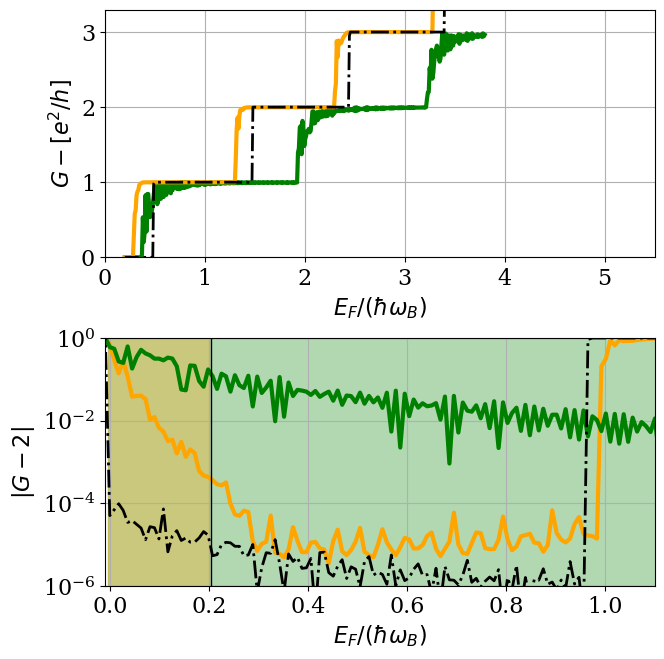

In [713]:
# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}
# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

#ax1.plot( (lowenergies ) / omB, lowG0, color='black', linewidth=2, linestyle='--')
ax1.plot( (highenergies) / omB, highGIMG, color='green', linewidth=3)
ax1.plot( (lowenergies) / omB, lowGIMG, color='orange', linewidth=3)

ax1.plot( (highenergies ) / omB, highG0, color='black', linewidth=2, linestyle='-.')


ax1.set_ylabel(r"$G - [e^2/h]$", fontdict=font)
ax1.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)


ax1.set_xlim((np.amin(lowenergies)/ omB,np.amax(lowenergies)/omB))
xmin = 0
xmax = 5.5

ax1.set_ylim((.0, 3.3))
ax1.set_xlim((xmin, xmax))
ax1.grid()

# Second plot (blue curve, right y-axis)
ax2.plot((lowenergies-lowEshift_IMG) / omB, np.abs(lowGIMG - 2), color='orange', linewidth=3, label='|GIMGT - 2|')
ax2.plot((highenergies-highEshift_IMG) / omB, np.abs(highGIMG - 2), color='green', linewidth=3, label='|GIMGT - 2|')
ax2.plot((lowenergies-lowEshift_0) / omB, np.abs(lowG0 - 2), color='black', linestyle='-.', linewidth=2)

om1 = 0.*omB-omB**2/32*(2*0**2+2*0+1)
om2 = 2.*omB-omB**2/32*(2*2**2+2*2+1)

ax2.axvspan(om1/ omB, (om1+highGamma_img) / omB, color='green', alpha=0.3)  # Add shaded area with low opacity
ax2.axvline((highGamma_img) / omB, color='black', linewidth=1)

om1 = 0.*omB-omB**2/32*(2*0**2+2*0+1)
ax2.axvspan(om1/ omB, (om1+lowGamma_img) / omB, color='orange', alpha=0.3)  # Add shaded area with low opacity
ax2.axvline((lowGamma_img) / omB, color='black', linewidth=1)


ax2.set_yscale('log')
ax2.set_ylabel(r"$|G - 2|$", fontdict=font)
ax2.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)

ax2.set_ylim((1e-6, 1e0))
ax2.set_xlim((-0.01, 1.1))

ax2.grid()

plt.tight_layout()
plt.gcf().set_size_inches(170 / 25.4, 170 / 25.4)
#plt.savefig('GR_Nx%d_Ny%d_BW%.2f_dis%.2f_xic%.2f_IMG%.2f_alpha%.2f_W%dL%d_pltdist%d_T%.3f.svg' % (L, W, BandW0, dis, xic, IMG, alpha, W, L, plate_distance, T0))
#plt.savefig('GR_Nx%d_Ny%d_BW%.2f_dis%.2f_xic%.2f_IMG%.2f_alpha%.2f_W%dL%d_pltdist%d_T%.3f.pdf' % (L, W, BandW0, dis, xic, IMG, alpha, W, L, plate_distance, T0))
plt.show()

In [820]:
distance = []
arrG0 = []
arrGIMG = []
arr_en = []
arrGam = []
shift_0 = []
shift_IMG = []



N_l = 1 #selected plateou

for nIMG in range(1,20):
    Eshift_0 = np.zeros(3)
    Eshift_IMG = np.zeros(3)
    Gamma_img = np.zeros(3)
    
    #Function to re-import the data and parameters from target file
    # Read the parameters
    params_sys = {}
    with open('G_%d.dat' % (nIMG), 'r') as f:
        for line in f:
            if line.startswith("#"):
                key, value = line[1:].strip().split(" = ")
                params_sys[key] = float(value) if '.' in value or 'e' in value.lower() else int(value)
            else:
                break

    t, W, L, alpha, xic, plate_distance, E_dis, E_img, ei, ef, Ne, iter_dis, Ncore = params_sys.values()
    lB = 1./np.sqrt(2*np.pi*alpha)
    omB = 4*np.pi*alpha

    distance.append( plate_distance/lB )

    # Read the data
    data = pd.read_csv('G_%d.dat' % (nIMG), sep=' ', comment='#')

    energies = data['Energies'].to_numpy()
    G0 = data['G0'].to_numpy()
    GIMG = data['GIMG'].to_numpy()
    
    for nl in range(3):
        # Define a threshold: small fraction of max(fX)
        threshold_shift_IMG = .0001 + (nl)
        threshold_shift_0 = .0001 + (nl)
        # Find the first index where fX exceeds the threshold
        nonzero_indices_IMG = np.where(GIMG> threshold_shift_IMG)[0]
        Eshift_IMG[nl] = energies[nonzero_indices_IMG[-1]]
        # Find the first index where fX exceeds the threshold
        nonzero_indices_0 = np.where(G0 > threshold_shift_0)[0]
        Eshift_0[nl] = energies[nonzero_indices_0[-1]]
        
        Gamma_img[nl] = 2*E_img/lB/np.abs( (plate_distance/lB)**2 ) * (nl+1)**.5
    
    shift_0.append(Eshift_0)
    shift_IMG.append(Eshift_IMG)
    
    arrG0.append( G0 )
    arrGIMG.append( GIMG )
    arr_en.append(energies)
    arrGam.append( Gamma_img )

arrG0 = np.asarray(arrG0)
arrGIMG = np.asarray(arrGIMG)
arr_en = np.asarray(arr_en)
arrGam = np.asarray(arrGam)
shift_0 = np.asarray(shift_0)
shift_IMG = np.asarray(shift_IMG)
distance = np.asarray( distance )

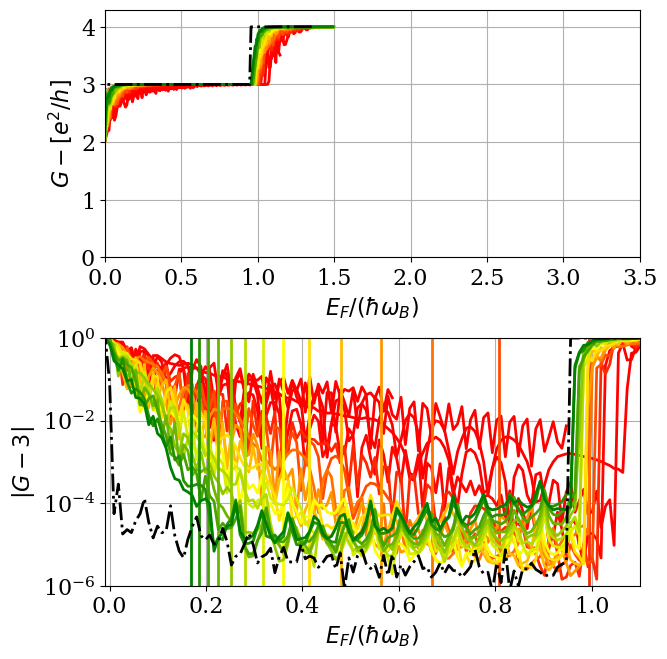

In [821]:
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors


# Second plot (blue curve, right y-axis)
norm = Normalize(vmin=min(distance)+5, vmax=max(distance))  # Normalize gS values
#cmap = plt.get_cmap('coolwarm')  # Color map transitioning from blue to red
cmap = mcolors.LinearSegmentedColormap.from_list("red_to_grey", ["red", "yellow", "green"])

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}
# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

#ax1.plot( (lowenergies ) / omB, lowG0, color='black', linewidth=2, linestyle='--')
"""nlow = 7
nhigh = 15
color1 = cmap(norm(distance[nlow]))
ax1.plot( (arr_en[nlow]-shift_IMG[nlow]) / omB, arrGIMG[nlow], color=color1, linewidth=3)
color2 = cmap(norm(distance[nhigh]))
ax1.plot( (arr_en[nhigh]-shift_IMG[nhigh]) / omB, arrGIMG[nhigh], color=color2, linewidth=3)"""

N_l = 2

for nG in range(19):
    color = cmap(norm(distance[nG]))
    ax1.plot( (arr_en[nG] - shift_IMG[nG][N_l]) / omB, arrGIMG[nG], color=color, linewidth=2, label='|GIMGT - 2|')
    #ax2.axvspan(0, arrGam[nG] / omB, color=color, alpha=0.3)  # Add shaded area with low opacity
    #ax2.axvline( .5*arrGam[nG] / omB, color=color, linewidth=2)

ax1.plot( (arr_en[10]-shift_0[10][N_l] ) / omB, arrG0[10], color='black', linewidth=2, linestyle='-.')


ax1.set_ylabel(r"$G - [e^2/h]$", fontdict=font)
ax1.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)


ax1.set_xlim((np.amin(lowenergies)/ omB,np.amax(lowenergies)/omB))
xmin = 0
xmax = 3.5

ax1.set_ylim((.0, 4.3))
ax1.set_xlim((xmin, xmax))
ax1.grid()





for nG in range(19):
    color = cmap(norm(distance[nG]))
    ax2.plot( (arr_en[nG] - shift_IMG[nG][N_l]) / omB, np.abs(arrGIMG[nG] - (1+N_l) ), color=color, linewidth=2, label='|GIMGT - 2|')
    #ax2.axvspan(0, arrGam[nG] / omB, color=color, alpha=0.3)  # Add shaded area with low opacity
    ax2.axvline( arrGam[nG][N_l] / omB, color=color, linewidth=2)

ax2.plot((arr_en[10] - shift_0[10][N_l]) / omB, np.abs(arrG0[10] - (1+N_l)), color='black', linestyle='-.', linewidth=2)

ax2.set_yscale('log')
ax2.set_ylabel(r"$|G - %d|$" % (1+N_l), fontdict=font)
ax2.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)

ax2.set_ylim((1e-6, 1e0))
ax2.set_xlim((-0.01, 1.1))

ax2.grid()




plt.tight_layout()
plt.gcf().set_size_inches(170 / 25.4, 170 / 25.4)
#plt.savefig('GR_Nx%d_Ny%d_BW%.2f_dis%.2f_xic%.2f_IMG%.2f_alpha%.2f_W%dL%d_pltdist%d_T%.3f.svg' % (L, W, BandW0, dis, xic, IMG, alpha, W, L, plate_distance, T0))
#plt.savefig('GR_Nx%d_Ny%d_BW%.2f_dis%.2f_xic%.2f_IMG%.2f_alpha%.2f_W%dL%d_pltdist%d_T%.3f.pdf' % (L, W, BandW0, dis, xic, IMG, alpha, W, L, plate_distance, T0))
plt.show()

(-2.0, -0.4)

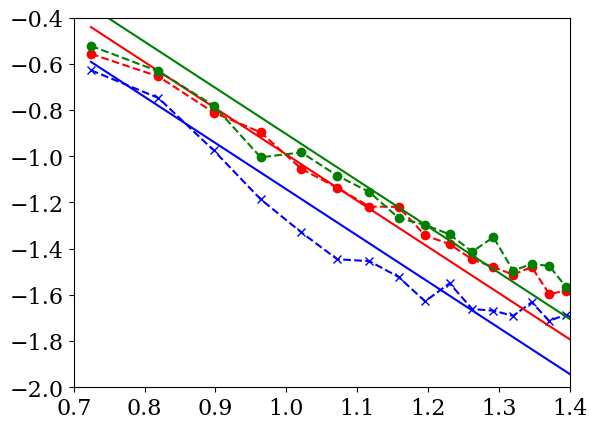

In [835]:
from scipy.stats import linregress

arrE_1 = np.zeros(len(distance))
arrE_2 = np.zeros(len(distance))
arrE_3 = np.zeros(len(distance))

slope_1 = np.zeros(len(distance))
slope_2 = np.zeros(len(distance))
slope_3 = np.zeros(len(distance))

inter_1 = np.zeros(len(distance))
inter_2 = np.zeros(len(distance))
inter_3 = np.zeros(len(distance))


t_exp = -2
sigma_u = 1
for nG in range(19):
    ne0 = np.argmin( np.abs((arr_en[nG] - shift_IMG[nG][0])/ omB)  )
    nef = np.argmin( np.abs(0.8-(arr_en[nG] - shift_IMG[nG][0])/ omB) )
    ne_t = np.argmin( np.abs( t_exp - np.log10(np.abs(arrGIMG[nG,nef:ne0] - 1)) ) )
    Ep = (arr_en[nG][ne_t+nef] - shift_IMG[nG][0])/ omB
    arrE_1[nG] = Ep

    # Extract the interval
    Ein = .005 * arrGam[nG,0]/omB
    Eout = .5 * arrGam[nG,0]/omB
    if Eout <= 0.8:
        ne0 = np.argmin( np.abs( Ein  - (arr_en[nG] - shift_IMG[nG][0])/ omB)  )
        nef = np.argmin( np.abs( Eout - (arr_en[nG] - shift_IMG[nG][0])/ omB) )
    else:
        ne0 = np.argmin( np.abs( 0.2  - (arr_en[nG] - shift_IMG[nG][0])/ omB)  )
        nef = np.argmin( np.abs( 0.8 - (arr_en[nG] - shift_IMG[nG][0])/ omB) )
    y = np.flip( arrGIMG[nG, nef:ne0] - 1 )
    x = np.flip( (arr_en[nG, nef:ne0]- shift_IMG[nG][0]) / omB )
    x_valid = x
    log_y_valid = np.log(np.abs(y))
    log_y_smooth = gaussian_filter1d(log_y_valid, sigma=sigma_u)
    # Fit log(y) = intercept - a * x
    slope, intercept, r_value, p_value, std_err = linregress(x_valid, log_y_smooth)
    a = -slope  # because slope = -a in the exp(-a x) model
    slope_1[nG] = 1/a
    inter_1[nG] = intercept
    
    
    
    
    
    ne0 = np.argmin( np.abs((arr_en[nG] - shift_IMG[nG][1])/ omB)  )
    nef = np.argmin( np.abs(0.8-(arr_en[nG] - shift_IMG[nG][1])/ omB) )
    ne_t = np.argmin( np.abs( t_exp - np.log10(np.abs(arrGIMG[nG,nef:ne0] - 2)) ) )
    Ep = (arr_en[nG][ne_t+nef] - shift_IMG[nG][1])/ omB
    arrE_2[nG] = Ep
    
    # Extract the interval
    Ein = .005 * arrGam[nG,1]/omB
    Eout = .5 * arrGam[nG,1]/omB
    if Eout <= 0.8:
        ne0 = np.argmin( np.abs( Ein  - (arr_en[nG] - shift_IMG[nG][1])/ omB)  )
        nef = np.argmin( np.abs( Eout - (arr_en[nG] - shift_IMG[nG][1])/ omB) )
    else:
        ne0 = np.argmin( np.abs( 0.2  - (arr_en[nG] - shift_IMG[nG][1])/ omB)  )
        nef = np.argmin( np.abs( 0.8 - (arr_en[nG] - shift_IMG[nG][1])/ omB) )
    y = np.flip( arrGIMG[nG, nef:ne0] - 2 )
    x = np.flip( (arr_en[nG, nef:ne0]- shift_IMG[nG][1]) / omB )
    x_valid = x
    log_y_valid = np.log(np.abs(y))
    log_y_smooth = gaussian_filter1d(log_y_valid, sigma=sigma_u)
    # Fit log(y) = intercept - a * x
    slope, intercept, r_value, p_value, std_err = linregress(x_valid, log_y_smooth)
    a = -slope  # because slope = -a in the exp(-a x) model
    slope_2[nG] = 1/a
    inter_2[nG] = intercept
    
    
    
    
    ne0 = np.argmin( np.abs((arr_en[nG] - shift_IMG[nG][2])/ omB)  )
    nef = np.argmin( np.abs(0.8-(arr_en[nG] - shift_IMG[nG][2])/ omB) )
    ne_t = np.argmin( np.abs( t_exp - np.log10(np.abs(arrGIMG[nG,nef:ne0] - 2)) ) )
    Ep = (arr_en[nG][ne_t+nef] - shift_IMG[nG][2])/ omB
    arrE_3[nG] = Ep
    
    # Extract the interval
    Ein = .005 * arrGam[nG,2]/omB
    Eout = .5 * arrGam[nG,2]/omB
    if Eout <= 0.4:
        ne0 = np.argmin( np.abs( Ein  - (arr_en[nG] - shift_IMG[nG][2])/ omB)  )
        nef = np.argmin( np.abs( Eout - (arr_en[nG] - shift_IMG[nG][2])/ omB) )
    else:
        ne0 = np.argmin( np.abs( 0.2  - (arr_en[nG] - shift_IMG[nG][2])/ omB)  )
        nef = np.argmin( np.abs( 0.8 - (arr_en[nG] - shift_IMG[nG][2])/ omB) )
    y = np.flip( arrGIMG[nG, nef:ne0] - 3 )
    x = np.flip( (arr_en[nG, nef:ne0]- shift_IMG[nG][2]) / omB )
    x_valid = x
    log_y_valid = np.log(np.abs(y))
    log_y_smooth = gaussian_filter1d(log_y_valid, sigma=sigma_u)
    # Fit log(y) = intercept - a * x
    slope, intercept, r_value, p_value, std_err = linregress(x_valid, log_y_smooth)
    a = -slope  # because slope = -a in the exp(-a x) model
    slope_3[nG] = 1/a
    inter_3[nG] = intercept
    
offset = -.0

"""plt.plot(distance, arrE_1, color='blue', marker='x', linestyle='--')
plt.plot(distance, .5*arrGam[:,0]/omB + offset, color='blue')
plt.plot(distance, arrE_2, color='red', marker='o', linestyle='--')
plt.plot(distance, .5*arrGam[:,1]/omB + offset, color='red')"""

#plt.plot(distance, slope_1, color='blue', marker='x', linestyle='--')
#plt.plot(distance, .15*arrGam[:,0]/omB + offset, color='blue')
#plt.plot(distance, slope_2, color='red', marker='o', linestyle='--')
#plt.plot(distance, .15*arrGam[:,1]/omB + offset, color='red')
amp = .09
plt.plot( np.log10(distance), np.log10(slope_1), color='blue', marker='x', linestyle='--')
plt.plot( np.log10(distance), np.log10(amp*arrGam[:,0]/omB + offset), color='blue')
plt.plot( np.log10(distance), np.log10(slope_2), color='red', marker='o', linestyle='--')
plt.plot( np.log10(distance), np.log10(amp*arrGam[:,1]/omB + offset), color='red')
plt.plot( np.log10(distance), np.log10(slope_3), color='green', marker='o', linestyle='--')
plt.plot( np.log10(distance), np.log10(amp*arrGam[:,2]/omB + offset), color='green')

plt.xlim(.7,1.4)
plt.ylim(-2,-.4)


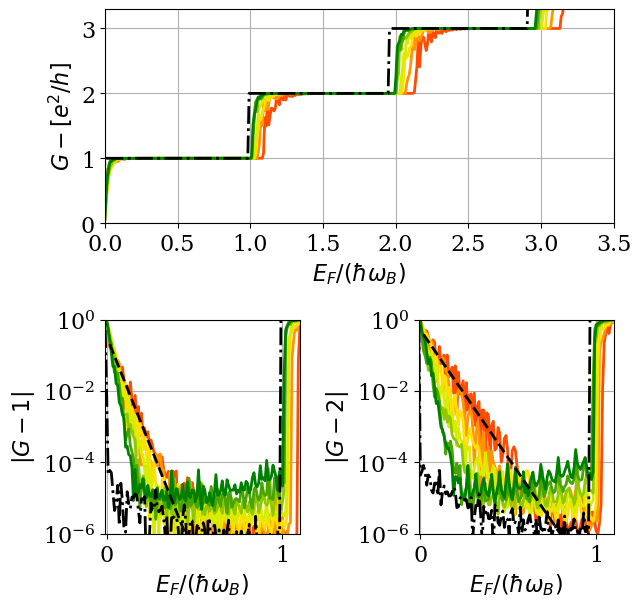

In [830]:
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(170 / 25.4, 170 / 25.4))  # same size as before

# Define a GridSpec: 3 rows (ax1 is 2 rows tall, ax2 and ax3 share 1 row), 2 columns (ax2 and ax3 sit side by side)
gs = GridSpec(nrows=3, ncols=2, height_ratios=[.75, .75, 0], figure=fig)

# ax1 spans both columns
ax1 = fig.add_subplot(gs[0, :])
# ax2 and ax3 sit in the second row
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


# Second plot (blue curve, right y-axis)
norm = Normalize(vmin=min(distance)+5, vmax=max(distance))  # Normalize gS values
#cmap = plt.get_cmap('coolwarm')  # Color map transitioning from blue to red
cmap = mcolors.LinearSegmentedColormap.from_list("red_to_grey", ["red", "yellow", "green"])

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}
# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

for nG in range(6,20, 2):
    color = cmap(norm(distance[nG]))
    ax1.plot( (arr_en[nG] - shift_IMG[nG][0]) / omB, arrGIMG[nG], color=color, linewidth=2, label='|GIMGT - 2|')
    #ax2.axvspan(0, arrGam[nG] / omB, color=color, alpha=0.3)  # Add shaded area with low opacity
    #ax2.axvline( .5*arrGam[nG] / omB, color=color, linewidth=2)

ax1.plot( (arr_en[0]-shift_0[0][0] ) / omB, arrG0[0], color='black', linewidth=2, linestyle='-.')


ax1.set_ylabel(r"$G - [e^2/h]$", fontdict=font)
ax1.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)


ax1.set_xlim((np.amin(lowenergies)/ omB,np.amax(lowenergies)/omB))
xmin = 0
xmax = 3.5

ax1.set_ylim((.0, 3.3))
ax1.set_xlim((xmin, xmax))
ax1.grid()





for nG in range(6,20, 2):
    color = cmap(norm(distance[nG]))
    ax2.plot( (arr_en[nG] - shift_IMG[nG][0]) / omB, np.abs(arrGIMG[nG] - 1), color=color, linewidth=2, label='|GIMGT - 2|')
    #ax2.axvspan(0, arrGam[nG] / omB, color=color, alpha=0.3)  # Add shaded area with low opacity
    #ax2.axvline( arrGam[nG][0] / omB, color=color, linewidth=2)

nT = 6
N_l = 0
ne0 = np.argmin( np.abs( .01*arrGam[nT,N_l]/omB - (arr_en[nT] - shift_IMG[nT][N_l])/ omB)  )
nef = np.argmin( np.abs(2*arrGam[nT,N_l]/omB - (arr_en[nT] - shift_IMG[nT][N_l])/ omB) )
x = np.flip( (arr_en[nT, nef:ne0]- shift_IMG[nT][N_l]) / omB )
ax2.plot( x, np.exp(-x/slope_1[nT]+inter_1[nT]), color='black', linewidth=2, linestyle='--' )


ax2.plot((arr_en[18] - shift_0[18][0]) / omB, np.abs(arrG0[18] - 1), color='black', linestyle='-.', linewidth=2)

ax2.set_yscale('log')
ax2.set_ylabel(r"$|G - 1|$", fontdict=font)
ax2.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)

ax2.set_ylim((1e-6, 1e0))
ax2.set_xlim((-0.01, 1.1))

ax2.grid()



for nG in range(6,20, 2):
    color = cmap(norm(distance[nG]))
    ax3.plot( (arr_en[nG] - shift_IMG[nG][1]) / omB, np.abs(arrGIMG[nG] - 2), color=color, linewidth=2, label='|GIMGT - 2|')
    #ax2.axvspan(0, arrGam[nG] / omB, color=color, alpha=0.3)  # Add shaded area with low opacity
    #ax3.axvline( arrGam[nG][1] / omB, color=color, linewidth=2)

nT = 6
N_l = 1
ne0 = np.argmin( np.abs( .01*arrGam[nT,N_l]/omB - (arr_en[nT] - shift_IMG[nT][N_l])/ omB)  )
nef = np.argmin( np.abs(2*arrGam[nT,N_l]/omB - (arr_en[nT] - shift_IMG[nT][N_l])/ omB) )
x = np.flip( (arr_en[nT, nef:ne0]- shift_IMG[nT][N_l]) / omB )
ax3.plot( x, np.exp(-x/slope_2[nT]+inter_2[nT]), color='black', linewidth=2, linestyle='--' )

ax3.plot((arr_en[18] - shift_0[18][1]) / omB, np.abs(arrG0[18] - 2), color='black', linestyle='-.', linewidth=2)

ax3.set_yscale('log')
ax3.set_ylabel(r"$|G - 2|$", fontdict=font)
ax3.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)

ax3.set_ylim((1e-6, 1e0))
ax3.set_xlim((-0.01, 1.1))

ax3.grid()





plt.tight_layout()

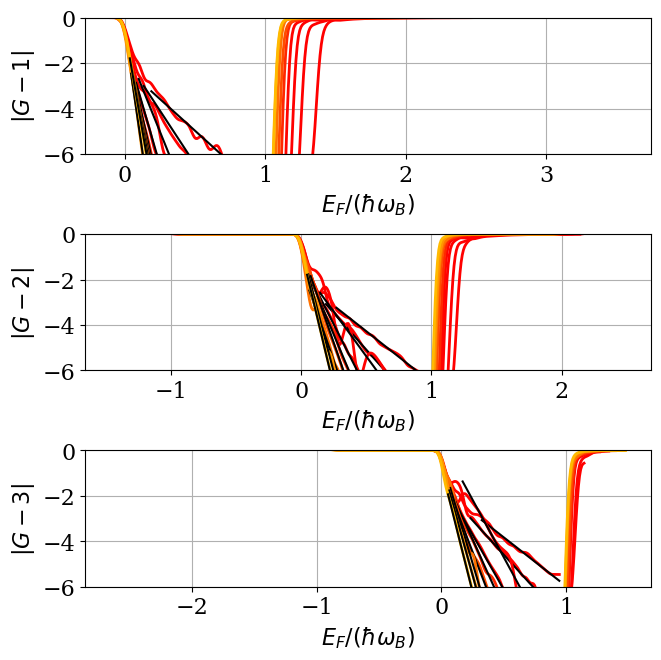

In [836]:
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors


# Second plot (blue curve, right y-axis)
norm = Normalize(vmin=min(distance)+5, vmax=max(distance))  # Normalize gS values
#cmap = plt.get_cmap('coolwarm')  # Color map transitioning from blue to red
cmap = mcolors.LinearSegmentedColormap.from_list("red_to_grey", ["red", "yellow", "green"])

# Font configuration
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}
# Apply the font globally
plt.rcParams['font.family'] = font['family']
plt.rcParams['font.size'] = font['size']
plt.rcParams['axes.labelsize'] = font['size']
plt.rcParams['xtick.labelsize'] = font['size']
plt.rcParams['ytick.labelsize'] = font['size']

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

N_l = 0
for nG in range(1,10):
    color = cmap(norm(distance[nG]))
    ax1.plot( (arr_en[nG] - shift_IMG[nG][N_l]) / omB, gaussian_filter1d( np.log( np.abs(arrGIMG[nG] - (1+N_l) )), sigma=3 ), color=color, linewidth=2, label='|GIMGT - 2|')
    
    
    ne0 = np.argmin( np.abs( .1*arrGam[nG,N_l]/omB - (arr_en[nG] - shift_IMG[nG][N_l])/ omB)  )
    nef = np.argmin( np.abs(1*arrGam[nG,N_l]/omB - (arr_en[nG] - shift_IMG[nG][N_l])/ omB) )
    x = np.flip( (arr_en[nG, nef:ne0]- shift_IMG[nG][N_l]) / omB )
    if N_l == 0:
        ax1.plot( x, -x/slope_1[nG]+inter_1[nG], color='black' )
    elif N_l == 1:
        ax1.plot( x, -x/slope_2[nG]+inter_2[nG], color='black' )


#ax2.set_yscale('log')
ax1.set_ylabel(r"$|G - %d|$" % (1+N_l), fontdict=font)
ax1.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)

ax1.set_ylim((-6, 0))
#ax2.set_xlim((-0.01, 1.1))

ax1.grid()


N_l = 1
for nG in range(1,10):
    color = cmap(norm(distance[nG]))
    ax2.plot( (arr_en[nG] - shift_IMG[nG][N_l]) / omB, gaussian_filter1d( np.log( np.abs(arrGIMG[nG] - (1+N_l) )), sigma=3 ), color=color, linewidth=2, label='|GIMGT - 2|')
    
    
    ne0 = np.argmin( np.abs( .1*arrGam[nG,N_l]/omB - (arr_en[nG] - shift_IMG[nG][N_l])/ omB)  )
    nef = np.argmin( np.abs(1*arrGam[nG,N_l]/omB - (arr_en[nG] - shift_IMG[nG][N_l])/ omB) )
    x = np.flip( (arr_en[nG, nef:ne0]- shift_IMG[nG][N_l]) / omB )
    if N_l == 0:
        ax2.plot( x, -x/slope_1[nG]+inter_1[nG], color='black' )
    elif N_l == 1:
        ax2.plot( x, -x/slope_2[nG]+inter_2[nG], color='black' )


#ax2.set_yscale('log')
ax2.set_ylabel(r"$|G - %d|$" % (1+N_l), fontdict=font)
ax2.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)

ax2.set_ylim((-6, 0))
#ax2.set_xlim((-0.01, 1.1))

ax2.grid()



N_l = 2
for nG in range(1,10):
    color = cmap(norm(distance[nG]))
    ax3.plot( (arr_en[nG] - shift_IMG[nG][N_l]) / omB, gaussian_filter1d( np.log( np.abs(arrGIMG[nG] - (1+N_l) )), sigma=3 ), color=color, linewidth=2, label='|GIMGT - 2|')
    
    
    ne0 = np.argmin( np.abs( .1*arrGam[nG,N_l]/omB - (arr_en[nG] - shift_IMG[nG][N_l])/ omB)  )
    nef = np.argmin( np.abs(1*arrGam[nG,N_l]/omB - (arr_en[nG] - shift_IMG[nG][N_l])/ omB) )
    x = np.flip( (arr_en[nG, nef:ne0]- shift_IMG[nG][N_l]) / omB )
    if N_l == 0:
        ax1.plot( x, -x/slope_1[nG]+inter_1[nG], color='black' )
    elif N_l == 1:
        ax2.plot( x, -x/slope_2[nG]+inter_2[nG], color='black' )
    elif N_l == 2:
        ax3.plot( x, -x/slope_3[nG]+inter_3[nG], color='black' )


#ax2.set_yscale('log')
ax3.set_ylabel(r"$|G - %d|$" % (1+N_l), fontdict=font)
ax3.set_xlabel(r"$E_F/(\hbar\omega_B)$", fontdict=font)

ax3.set_ylim((-6, 0))
#ax2.set_xlim((-0.01, 1.1))

ax3.grid()




plt.tight_layout()
plt.gcf().set_size_inches(170 / 25.4, 170 / 25.4)
#plt.savefig('GR_Nx%d_Ny%d_BW%.2f_dis%.2f_xic%.2f_IMG%.2f_alpha%.2f_W%dL%d_pltdist%d_T%.3f.svg' % (L, W, BandW0, dis, xic, IMG, alpha, W, L, plate_distance, T0))
#plt.savefig('GR_Nx%d_Ny%d_BW%.2f_dis%.2f_xic%.2f_IMG%.2f_alpha%.2f_W%dL%d_pltdist%d_T%.3f.pdf' % (L, W, BandW0, dis, xic, IMG, alpha, W, L, plate_distance, T0))
plt.show()

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_3535/750164291.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


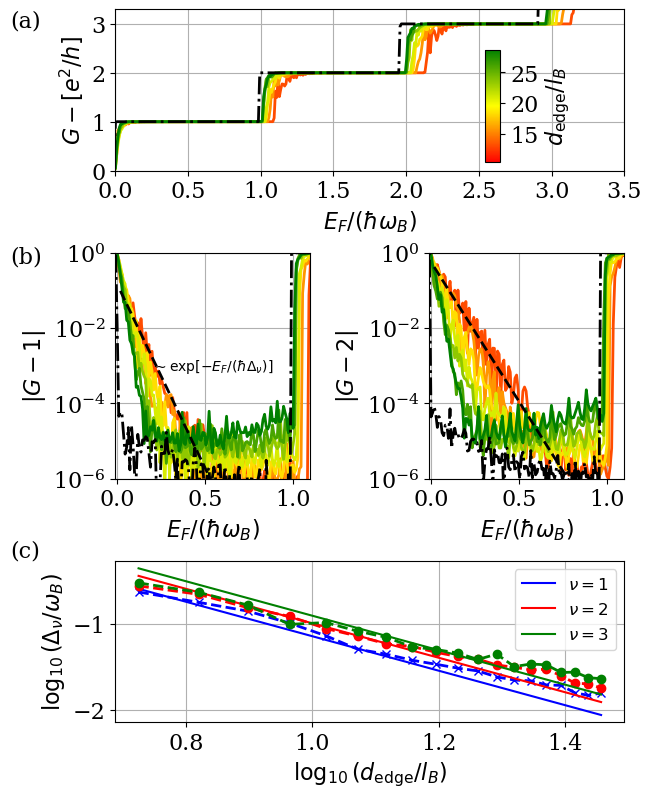

In [861]:
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.stats import linregress
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



# --- Precompute slopes and intercepts ---
arrE_1 = np.zeros(len(distance))
arrE_2 = np.zeros(len(distance))
slope_1 = np.zeros(len(distance))
slope_2 = np.zeros(len(distance))
inter_1 = np.zeros(len(distance))
inter_2 = np.zeros(len(distance))

t_exp = -2
sigma_u = .5

for nG in range(len(distance)):
    for N_l, arrVal, slope_arr, inter_arr, subtract in zip(
        [0, 1], [arrE_1, arrE_2], [slope_1, slope_2], [inter_1, inter_2], [1, 2]
    ):
        ne0 = np.argmin(np.abs((arr_en[nG] - shift_IMG[nG][N_l]) / omB))
        nef = np.argmin(np.abs(0.8 - (arr_en[nG] - shift_IMG[nG][N_l]) / omB))
        ne_t = np.argmin(np.abs(t_exp - np.log10(np.abs(arrGIMG[nG, nef:ne0] - subtract))))
        Ep = (arr_en[nG][ne_t + nef] - shift_IMG[nG][N_l]) / omB
        arrVal[nG] = Ep

        # Interval for fit
        Ein = 0.01 * arrGam[nG, N_l] / omB
        Eout = 1 * arrGam[nG, N_l] / omB
        if Eout <= 0.8:
            ne0 = np.argmin(np.abs(Ein - (arr_en[nG] - shift_IMG[nG][N_l]) / omB))
            nef = np.argmin(np.abs(Eout - (arr_en[nG] - shift_IMG[nG][N_l]) / omB))
        else:
            ne0 = np.argmin(np.abs(0.2 - (arr_en[nG] - shift_IMG[nG][N_l]) / omB))
            nef = np.argmin(np.abs(0.8 - (arr_en[nG] - shift_IMG[nG][N_l]) / omB))

        y = np.flip(arrGIMG[nG, nef:ne0] - subtract)
        x = np.flip((arr_en[nG, nef:ne0] - shift_IMG[nG][N_l]) / omB)
        log_y_valid = np.log(np.abs(y))
        log_y_smooth = gaussian_filter1d(log_y_valid, sigma=sigma_u)
        slope, intercept, *_ = linregress(x, log_y_smooth)
        a = -slope
        slope_arr[nG] = 1 / a
        inter_arr[nG] = intercept

# --- Start plotting ---
fig = plt.figure(figsize=(170 / 25.4, 210 / 25.4))
#gs = GridSpec(nrows=4, ncols=2, height_ratios=[1, 1, 0.1, 1], figure=fig)

#ax1 = fig.add_subplot(gs[0, :])
#ax2 = fig.add_subplot(gs[1, 0])
#ax3 = fig.add_subplot(gs[1, 1])
#ax4 = fig.add_subplot(gs[3, :])

gs = GridSpec(nrows=3, ncols=2, height_ratios=[.5, .7, 0.5], figure=fig)

ax1 = fig.add_subplot(gs[0, :])      # spans full width, top row
ax2 = fig.add_subplot(gs[1, 0])      # bottom-left of middle row
ax3 = fig.add_subplot(gs[1, 1])      # bottom-right of middle row
ax4 = fig.add_subplot(gs[2, :])      # full bottom row (closer now)

# Color map setup
norm = Normalize(vmin=min(distance) + 5, vmax=max(distance))
cmap = mcolors.LinearSegmentedColormap.from_list("red_to_grey", ["red", "yellow", "green"])

# Font setup
font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}
plt.rcParams.update({
    'font.family': font['family'],
    'font.size': font['size'],
    'axes.labelsize': font['size'],
    'xtick.labelsize': font['size'],
    'ytick.labelsize': font['size'],
})
from matplotlib.cm import ScalarMappable

# Create ScalarMappable for colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)

# Inset for colorbar in ax1
cax = inset_axes(ax1, width="3%", height="70%", loc='center right',
                 bbox_to_anchor=(-.2, -.1, 1, 1), bbox_transform=ax1.transAxes, borderpad=1)

cbar = plt.colorbar(sm, cax=cax)
cbar.set_label(r"$d_{\rm edge}/l_B$")

# --- ax1 ---
for nG in range(6, len(distance), 2):
    color = cmap(norm(distance[nG]))
    ax1.plot((arr_en[nG] - shift_IMG[nG][0]) / omB, arrGIMG[nG], color=color, linewidth=2)

ax1.plot((arr_en[0] - shift_0[0][0]) / omB, arrG0[0], color='black', linewidth=2, linestyle='-.')

ax1.set_ylabel(r"$G - [e^2/h]$")
ax1.set_xlabel(r"$E_F/(\hbar\omega_B)$")
ax1.set_xlim((0, 3.5))
ax1.set_ylim((.0, 3.3))
ax1.set_yticks(np.arange(0, 3.1, 1))  # From 0 to 3 in steps of 1
ax1.grid()

# --- ax2 ---
for nG in range(6, len(distance), 2):
    color = cmap(norm(distance[nG]))
    ax2.plot((arr_en[nG] - shift_IMG[nG][0]) / omB, np.abs(arrGIMG[nG] - 1), color=color, linewidth=2)

nT, N_l = 6, 0
ne0 = np.argmin(np.abs(.01 * arrGam[nT, N_l] / omB - (arr_en[nT] - shift_IMG[nT][N_l]) / omB))
nef = np.argmin(np.abs(2 * arrGam[nT, N_l] / omB - (arr_en[nT] - shift_IMG[nT][N_l]) / omB))
x = np.flip((arr_en[nT, nef:ne0] - shift_IMG[nT][N_l]) / omB)
ax2.plot(x, np.exp(-x / slope_1[nT] + inter_1[nT]), color='black', linewidth=2, linestyle='--')
ax2.plot((arr_en[18] - shift_0[18][0]) / omB, np.abs(arrG0[18] - 1), color='black', linestyle='-.', linewidth=2)

ax2.set_yscale('log')
ax2.set_ylabel(r"$|G - 1|$")
ax2.set_xlabel(r"$E_F/(\hbar\omega_B)$")
ax2.set_xlim((-0.01, 1.1))
ax2.set_ylim((1e-6, 1e0))
ax2.set_xticks(np.arange(0, 1.5, 0.5))  

ax2.grid()

# --- ax3 ---
for nG in range(6, len(distance), 2):
    color = cmap(norm(distance[nG]))
    ax3.plot((arr_en[nG] - shift_IMG[nG][1]) / omB, np.abs(arrGIMG[nG] - 2), color=color, linewidth=2)

nT, N_l = 6, 1
ne0 = np.argmin(np.abs(.01 * arrGam[nT, N_l] / omB - (arr_en[nT] - shift_IMG[nT][N_l]) / omB))
nef = np.argmin(np.abs(2 * arrGam[nT, N_l] / omB - (arr_en[nT] - shift_IMG[nT][N_l]) / omB))
x = np.flip((arr_en[nT, nef:ne0] - shift_IMG[nT][N_l]) / omB)
ax3.plot(x, np.exp(-x / slope_2[nT] + inter_2[nT]), color='black', linewidth=2, linestyle='--')
ax3.plot((arr_en[18] - shift_0[18][1]) / omB, np.abs(arrG0[18] - 2), color='black', linestyle='-.', linewidth=2)

ax3.set_yscale('log')
ax3.set_ylabel(r"$|G - 2|$")
ax3.set_xlabel(r"$E_F/(\hbar\omega_B)$")
ax3.set_xlim((-0.01, 1.1))
ax3.set_ylim((1e-6, 1e0))
ax3.set_xticks(np.arange(0, 1.5, 0.5))  
ax3.grid()

# --- ax4 ---
offset = 0
amplitude = .09
ax4.plot(np.log10(distance), np.log10(slope_1), color='blue', marker='x', linestyle='--', linewidth=2)
ax4.plot(np.log10(distance), np.log10(amplitude * arrGam[:, 0] / omB + offset), color='blue', label=r'$\nu=1$')

ax4.plot(np.log10(distance), np.log10(slope_2), color='red', marker='o', linestyle='--', linewidth=2)
ax4.plot(np.log10(distance), np.log10(amplitude * arrGam[:, 1] / omB + offset), color='red', label=r'$\nu=2$')

ax4.plot(np.log10(distance), np.log10(slope_3), color='green', marker='o', linestyle='--', linewidth=2)
ax4.plot(np.log10(distance), np.log10(amplitude * arrGam[:, 2] / omB + offset), color='green', label=r'$\nu=3$')

ax4.set_xlabel(r"$\log_{10}(d_{\rm edge}/l_B)$")
ax4.set_ylabel(r"$\log_{10}(\Delta_{\nu}/\omega_B)$")
ax4.grid()

ax4.legend(loc='upper right', fontsize=12)

inset = inset_axes(ax2, width="35%", height="35%", loc='center',
                   bbox_to_anchor=(0, 0, 1, 1), bbox_transform=ax2.transAxes)

inset.axis("off")  # Turn off axis for text-only inset
inset.text(0.5, 0.5, r"$\sim \exp[-E_F/(\hbar \Delta_{\nu})]$", fontsize=10, ha='center', va='center')

# Global labels (a), (b), (c), (d) aligned vertically on the left
fig.text(0.02, ax1.get_position().y1+.09, "(a)", va="top", ha="left", fontsize=16)
fig.text(0.02, ax2.get_position().y1+.05, "(b)", va="top", ha="left", fontsize=16)
fig.text(0.02, ax4.get_position().y1+.02, "(c)", va="top", ha="left", fontsize=16)

# Layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.45)

#plt.savefig('fig3.pdf')